In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to Measurement table
Measurement = Base.classes.measurement
Measurement.__dict__


mappingproxy({'__table__': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 1f601ff87d8>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1f601ff88e0>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1f601ff8990>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1f601ff89e8>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1f601ff8a40>,
              'tobs': <sqlalc

In [9]:
# Save reference of Station table
Station = Base.classes.station
Station.__dict__

mappingproxy({'__table__': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.station'> at 1f601ff8938>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1f601ff8b48>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1f601ff8bf8>,
              'name': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1f601ff8c50>,
              'latitude': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1f601ff8ca8

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

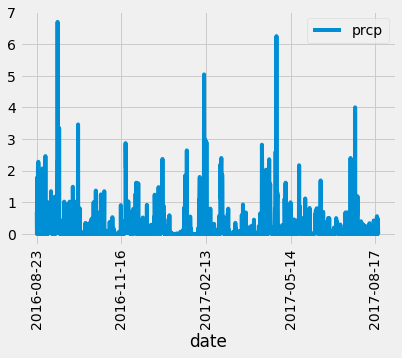

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first() 

# Get date into format for calculation and take a year off to find last year data
dateparts = last_date[0].split('-')
previousyear = dt.date(int(dateparts[0]),int(dateparts[1]),int(dateparts[2]))- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >=previousyear).\
order_by(Measurement.date.desc()).all()
data

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_data = pd.DataFrame(data)
prec_data.set_index('date', inplace = True)
prec_data

# Drop NAN values
clean_data = prec_data.dropna(axis=0,how='all')
clean_data

# Sort the dataframe by date
sorted_data = clean_data.sort_values(by="date",ascending=True)
sorted_data

# Use Pandas Plotting with Matplotlib to plot the data

graph = sorted_data.plot(rot=90)
plt.title = "Precipitation by Date"
plt.ylabel = "Precipitation"

plt.show()



In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = sorted_data.describe()
summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
count=session.query(Station.id).count()
count

9

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
count_station = session.query(Measurement.station,(func.count(Measurement.station))).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
count_station

# Unpack tuples
unpack = [station for station,count in count_station]
unpack

# get the most activate station
most_active_station = unpack[0]
most_active_station

'USC00519281'

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest = session.query(func.min(Measurement.tobs)).filter(Measurement.station==most_active_station).first()
print(lowest)

highest = session.query(func.max(Measurement.tobs)).filter(Measurement.station==most_active_station).first()
print(highest)

average = session.query(func.avg(Measurement.tobs)).filter(Measurement.station==most_active_station).first()
print(average)

(54.0,)
(85.0,)
(71.66378066378067,)


In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# get last date of most active station
last_date_station = session.query(Measurement.date).filter(Measurement.station==most_active_station).\
            order_by(Measurement.date.desc()).first()
print(last_date_station)

# Get date into format for calculation and take a year off to find last year data
last_date_parts = last_date_station[0].split('-')
previous_year_station = dt.date(int(last_date_parts[0]),int(last_date_parts[1]),\
                                int(last_date_parts[2]))- dt.timedelta(days=365)
print(previous_year_station)

# query of last 12 months of temperature observation for most active station
last_year_station=session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >previous_year_station).\
                filter(Measurement.station==most_active_station).\
                order_by(Measurement.date.desc()).all()
last_year_station


('2017-08-18',)
2016-08-18


[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

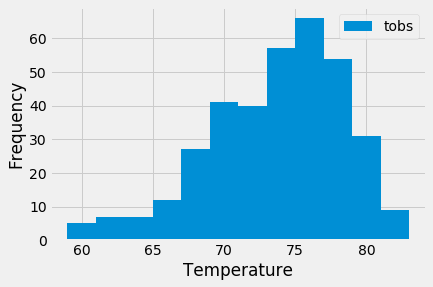

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prec_data_station = pd.DataFrame(last_year_station)
prec_data_station.set_index('date', inplace = True)
prec_data_station

clean_data_station = prec_data_station.dropna(axis=0,how='all')
clean_data_station

# Sort the dataframe by date
sorted_data_station = clean_data_station.sort_values(by="date",ascending=False)
sorted_data_station

# plot the histogram
sorted_data_station.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()


## Bonus Challenge Assignment

In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [19]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [20]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [21]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [22]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [23]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [24]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [25]:
# Plot the daily normals as an area plot with `stacked=False`
